In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import os
import cv2
import keras
import os
from keras.models import load_model
from keras.utils import to_categorical

In [2]:
testingDataset = r"D:\MS Computer Engineering\Semester 1\CV\testing_dataset\\"

images=[]
labels=[]
for folders in os.listdir(testingDataset):
    for files in os.listdir(testingDataset+folders):
        img=cv2.imread(testingDataset+'/'+folders+r'/'+files,0)/255
        img=cv2.resize(img,(128,128))
        img.shape=(128,128,1)
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels) 

In [4]:
model = load_model(r"D:\MS Computer Engineering\Semester 1\CV\Final Project\tamil_characters_CNN.h5")

In [5]:
y_labels=to_categorical(labels)
temp = np.zeros((len(y_labels),56-11))

y_labels = tf.convert_to_tensor(np.append(y_labels,temp, axis = 1))
y_labels

<tf.Tensor: shape=(64, 56), dtype=float64, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])>

In [6]:
model.evaluate(images,y_labels)

2/2 [==============================] - 1s 95ms/step - loss: 0.5744 - accuracy: 0.8438


[0.5743585824966431, 0.84375]

1/1 [==============================] - 0s 40ms/step
Predicted Letter is ஊ


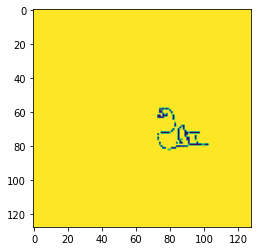

1/1 [==============================] - 0s 50ms/step
Predicted Letter is இ


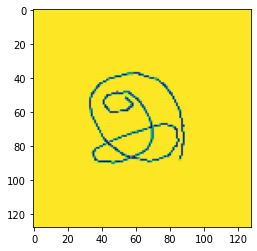

1/1 [==============================] - 0s 35ms/step
Predicted Letter is அ


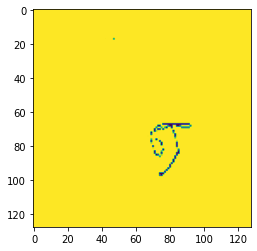

1/1 [==============================] - 0s 44ms/step
Predicted Letter is ஆ


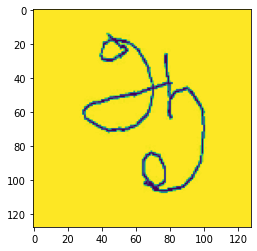

1/1 [==============================] - 0s 38ms/step
Predicted Letter is ஐ


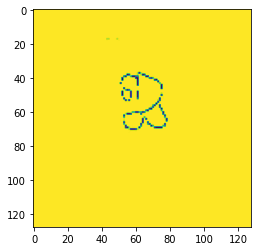

1/1 [==============================] - 0s 39ms/step
Predicted Letter is ஈ


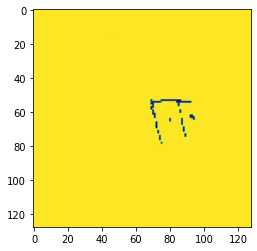

1/1 [==============================] - 0s 41ms/step
Predicted Letter is ஈ


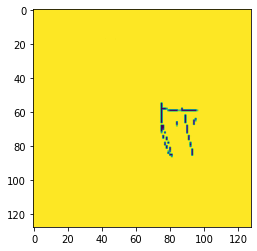

1/1 [==============================] - 0s 36ms/step
Predicted Letter is அ


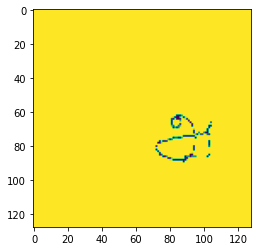

In [14]:
unclassified_data = r"D:\MS Computer Engineering\Semester 1\CV\unclassified_data\\"
unicode = [u'\u0B85',u'\u0B86',u'\u0B87',u'\u0B88',u'\u0B89',u'\u0B8A',u'\u0B8E',u'\u0B8F',u'\u0B90',u'\u0B92',u'\u0B93',u'\u0B94']
for image in os.listdir(unclassified_data):
        img=cv2.imread(unclassified_data+image,0)/255
        img=cv2.resize(img,(128,128))
        img_cpy = img.reshape(-1,128,128,1)
        prediction = model.predict([img_cpy])
        plt.imshow(img)
        print("Predicted Letter is {pred_letter}".format(pred_letter = unicode[np.argmax(prediction)]))
        plt.show()
